# PCA



* this is a toy example with such a low number of features usually you don't use PCA
* but because is a small dataset it allows to plot graphs that can explain how the PCA works

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# import some data from the built-in dataset of scklearn
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

* these are the labels 
{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [4]:
df = pd.DataFrame(iris.data, columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'])
print(df.head())
df["target"] = iris.target

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


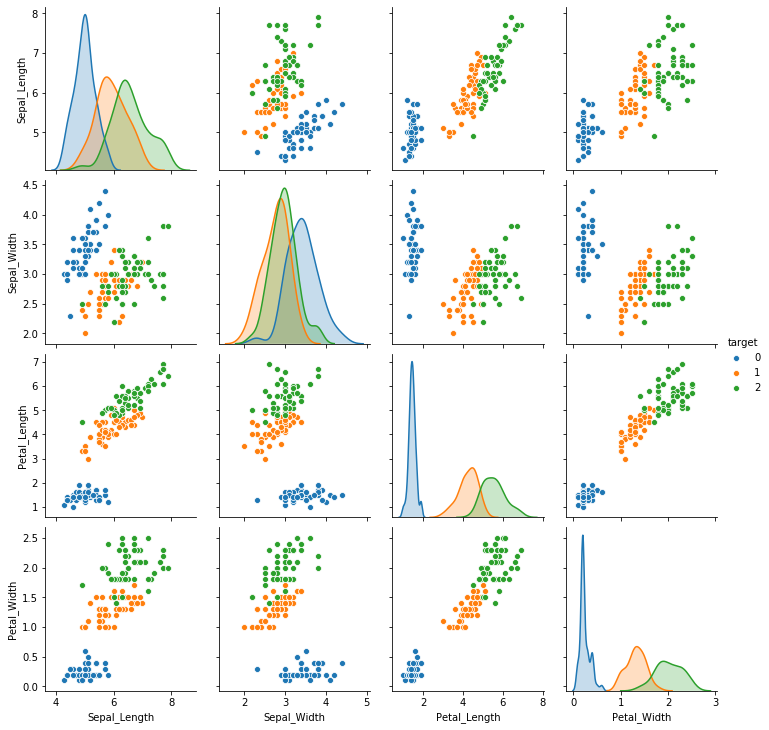

In [5]:
sns.pairplot(df, hue="target")

## Create the X and y

In [6]:
y = df["target"]
X = df[['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']]

### PCA features

The iris dataset is 4-dimensional. But what is its **intrinsic dimension**? (**Intrinsic dimension** = number of features needed to approximate the dataset) 

* we are going to use PCA to find the solution to this question



* first **we need to scale the data**

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
# Create scaler: scaler
scaler = StandardScaler()

In [9]:
# Fit_transform scaler to 'X'
X_norm = scaler.fit_transform(X)

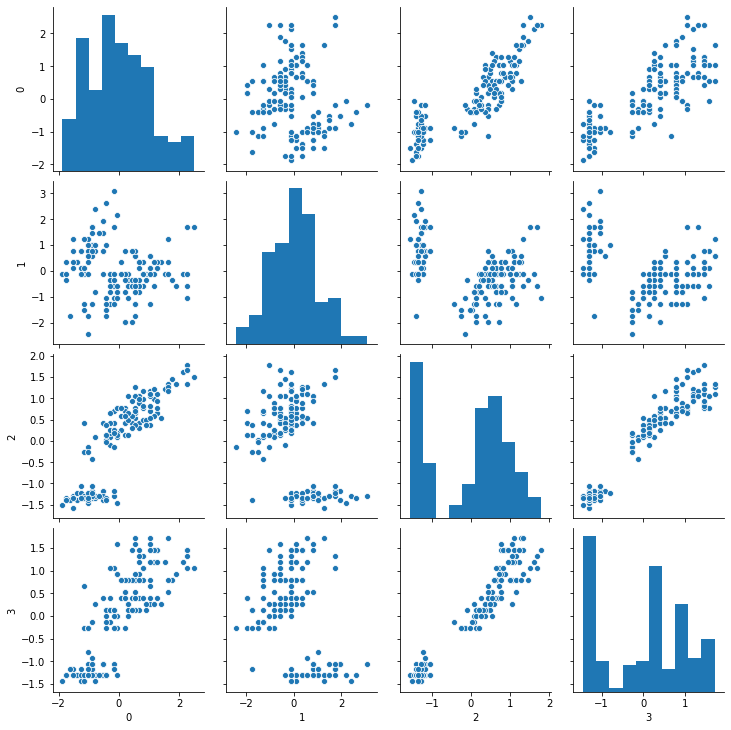

In [10]:
X_norm_df = pd.DataFrame(X_norm)
X_norm_df.describe()
#X.describe()

#sns.pairplot(X)
sns.pairplot(X_norm_df)

* now we can create the PCA and fit the data

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Create a PCA instance:
pca = PCA() # try 0.90

In [ ]:
# Fit pca to 'X'
pca_features = pca.fit_transform(X_norm)
pca_features.shape


### we can also plot how much variance of the data each PCA feature explains

* Use the plt.bar() function to plot the explained variances, with features on the x-axis and ```pca.explained_variance_``` on the y-axis.

In [ ]:
import matplotlib.pyplot as plt

# Plot the explained variances

features = range(0, pca.n_components_) # this is just to make the graph flexible if size of x increases
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

##### Looking at the plot, what do you think would be a reasonable choice for the "intrinsic dimension" of the the iris dataset? 
* Recall that the intrinsic dimension is the number of PCA features with significant variance.
* try to use **keep 90% of the variance** and plot the graph again

### more plots - look how the classes are separated after the PCA



In [ ]:
new_df = pd.DataFrame(pca_features)
new_df["target"] = df["target"]
new_df.head()

In [ ]:
sns.pairplot(new_df, hue = "target")

# Create a model With PCA data

### split the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pca_features, y)  # here we pass the PCA features

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

In [ ]:
lr.score(x_train,y_train)

In [ ]:
lr.score(x_test,y_test)

## model without PCA


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y)
lr2 = LogisticRegression()
lr2.fit(x_train, y_train)
lr2.score(x_train,y_train)

In [ ]:
lr2.score(x_test,y_test)

# your turn


* try different value for pca
* compare the original and the pair plot after PCA and make a conclusion is PCA is useful in this case.
* extra - try random forest (se below solution)
* look at the day of Random Forest Notebook or Scikit learn Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pca_features, y) 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

In [ ]:
rfc.score(x_train,y_train)

In [ ]:
rfc.score(x_test,y_test)

* without PCA

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y) 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)

In [ ]:
rfc.score(x_test,y_test)